<h1><center>DSA 4212: Year 2022</center></h1>
<h3><center> Assignment 1 (Deadline: Sunday 27th March at 23:59) </center></h3>
<h4><center> Group Number: ???? </center></h4>
<h4><center> Filename: assignment_1_XX.ipynb where XX is your group number</center></h4>
<h4><center> Group Member 1: Student Name, Student ID </center></h4>
<h4><center> Group Member 2: Student Name, Student ID </center></h4>
<h4><center> Group Member 3: Student Name, Student ID </center></h4>
<h4><center> Group Member 4: Student Name, Student ID </center></h4>

**Remark:** as described below, each group has to submit two documents on lumiNUS: 
1. a jupyter notebook with your code  
2. a pdf report explaining your approaches and conclusions.
3. you can have a look at `https://www.overleaf.com/read/xmvqgpsdqwyx` if you would like to use Overleaf and Latex to rapidly produce a neat report. You can use your NUS email to create an Overleaf account.

**File naming convention:**
1. the Jupyter notebook needs to be named `assignment_1_XX.ipynb`. For example, group number 3 needs to name its jupyter notebook as `assignment_1_03.ipynb`.
1. the pdf report needs to be named `assignment_1_XX.pdf`. For example, group number 3 needs to name its pdf report as `assignment_1_03.pdf`.



In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
# mount the Google Drive 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# display current directory
!pwd

/content


In [ ]:
# on my google drive, I have stored the celeba dataset at: datasets/celeba
# let us list that directory
!ls /content/drive/MyDrive/Colab\ Notebooks/DSA4212

 assignment_1_celeba.ipynb  'Copy of Feature Extraction (1).ipynb'
'Assignment 1 .gdoc'	    'Copy of Feature Extraction.ipynb'
 assignment_1_task7.ipynb   'Feature Extraction.ipynb'
 Assignment2.gdoc	     img_celeba_small
 celeba.csv		     img_celeba_small.zip


In [ ]:
# let's unzip the data (takes a bit of time, be patient) in the same directory
# It takes a few minutes (but only needs to be done once) -- roughly unzip 100 files per seconds
!unzip /content/drive/MyDrive/Colab\ Notebooks/DSA4212/img_celeba_small.zip  -d  /content/drive/MyDrive/Colab\ Notebooks/DSA4212

Archive:  /content/drive/MyDrive/Colab Notebooks/DSA4212/img_celeba_small.zip


KeyboardInterrupt: ignored

In [ ]:
import imageio
import os
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd
import time

In [ ]:
#let us list all the files in the image directory
path = "/content/drive/MyDrive/Colab Notebooks/DSA4212/img_celeba_small/"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

# sort the images by alphabetical order 
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)


Number of images: 20000


In [ ]:
# let us time how long it takes to load a few images
N_to_load = 5000
start = time.time()
for k, file in enumerate(all_img[:N_to_load]):
    im = imageio.imread(os.path.join(path, file)).astype(float)
    im = resize(im, (100,100) )

    n_files_loaded_so_far = k+1
    if n_files_loaded_so_far % 500 == 0:
      speed = n_files_loaded_so_far / (time.time() - start )
      print(f"Files loaded: {n_files_loaded_so_far} \t Loading Speed: {speed:2.1f} files loaded per second")

In [ ]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) # for higher accuracy

import jax
import jax.numpy as np

import pylab as plt
import imageio
import os
import numpy as onp
# to install scikit-image: !pip install scikit-image
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd



# Data Dowload
1. Download the "celeba_small.zip" file available on lumiNUS.
This is a 146Mo large zip-file containing 20K face images.
2. Download the attribute file "celeba.csv" available on lumiNUS.
3. Unzip the file "celeba_small.zip" in the directory of your choice. (Data = 175 Mo when uncompressed). 


# Brief Data exploration

In [ ]:
#load attributes csv file
path_csv  = "/content/drive/MyDrive/Colab Notebooks/DSA4212/"
attribute = pd.read_csv(os.path.join(path_csv, "celeba.csv"))


In [ ]:
#"attribute" is a dictionary containing several attributes for each image
attribute.keys()

Index(['Filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
#let us list all the files in the image directory
path = "/content/drive/MyDrive/Colab Notebooks/DSA4212/img_celeba_small/"
all_img = [f for f in os.listdir(path) 
                 if os.path.isfile(os.path.join(path, f)) 
                 and f.endswith(".jpg")]

# sort the images by alphabetical order 
# !!!! VERY IMPORTANT in order to be consistent with the labels contained in celeba.csv !!!!
all_img.sort()
nb_img = len(all_img)
print("Number of images:", nb_img)

#let us keep only the relevant attributes
attribute = attribute[:20000]

Number of images: 20000


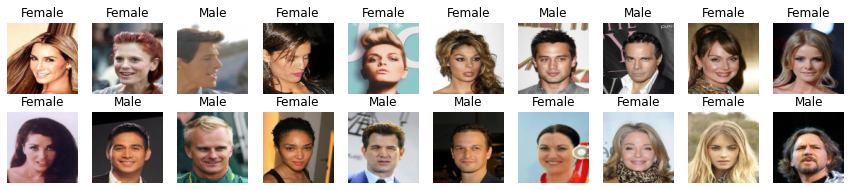

In [ ]:
#let us display the first 20 images
# !!! MAKE SURE THAT THE LABELS ARE CORRECT !!!
plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100 for display (you do not have to do this in the assignment)
    im = resize(im, (100,100) )
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255.)
    plt.axis("off")
    
    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")
    

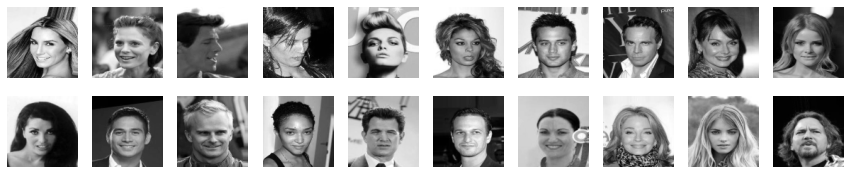

In [ ]:
#let us display the first 20 images in black and white
plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100
    im = resize(im, (100,100) )
    #transform to black and white by averaging the 3 color channels
    im = onp.mean(im, axis=2)
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255., cmap="gray")
    plt.axis("off")

In [ ]:
#let us load the first 500 images
n_img = 500
img_array = onp.zeros((n_img, 100,100))
for k in range(n_img):
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    im = resize(im, (100,100) )
    im = onp.mean(im, axis=2) # average the last channel
    img_array[k,:,:] = im

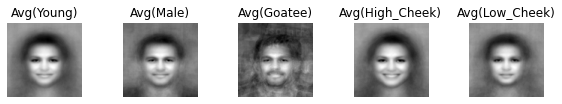

In [ ]:
#let us plot a few "average" faces
plt.figure(figsize=(10,3))

plt.subplot(2,5,1)
is_young = attribute["Young"][:n_img]==1
plt.imshow(onp.mean(img_array[is_young,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Young)")

plt.subplot(2,5,2)
is_male = attribute["Male"][:n_img]==1
plt.imshow(onp.mean(img_array[is_male,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Male)")


plt.subplot(2,5,3)
is_Goatee = attribute["Goatee"][:n_img]==1
plt.imshow(onp.mean(img_array[is_Goatee,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Goatee)")


plt.subplot(2,5,4)
is_High_Cheekbones = attribute["High_Cheekbones"][:n_img]==1
plt.imshow(onp.mean(img_array[is_High_Cheekbones,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(High_Cheek)")


plt.subplot(2,5,5)
is_Low_Cheekbones = attribute["High_Cheekbones"][:n_img]==-1
plt.imshow(onp.mean(img_array[is_Low_Cheekbones,:,:], axis=0), cmap="gray")
plt.axis("off")
plt.title("Avg(Low_Cheek)")

#
#  FIGURE EXPORT:
#
# To export figures to include in the pdf report, you can use the 
# following command, making sure that dpi is high enough in order
# to export a figure with reasonable quality
plt.savefig("high_quality_export.png", dpi=300)

In [ ]:
# let us compute the proportion of male images
proportion_male = np.mean(attribute["Male"].values==1)
print(f"Proportion of Young people in the dataset: {100*proportion_male: .1f} %",  )

Proportion of Young people in the dataset:  42.2 %




# General Remarks

Your assignment consists in building an algorithm that can automatically tell whether an image corresponds to a Male or Female. 

1. You are only allowed to use (variants of) logistic regression models (possibly with regularization + feature engineering). In othe words, do not use deep-learning / convolutional-layers / etc.., that is not the purpose of this assignment
2. You can only use the first 15,000 images to train your models (note that you do not have to use all the 15,000 first images if you do not want to). The accuracy of your model will be evaluated on the last 5,000 images. The last 5,000 images constitute the test set.
3. You are allowed to use whatever optimization algorithm you think is most efficient.
4. You are allowed to do whatever pre-processing and feature engineering you deem appropriate.
5. You will report the accuracy (i.e. th percentage of correctly classified) on the test dataset (i.e. the last 5,000 images). 
6. You will as well report the Area Under the Curve (AUC) of your classifier on the test dataset.


# Specific Tasks
1. How does the accuracy (ie. tested on the last 5,000 images) depend on the size of the training set? Is it necessary to use all the training set, or does the accuracy stabilize before?
2. How does the accuracy depend on the resolution of the input image?
3. Is it necessary to use colored images (or black & white images are enough)? Is it helpful to increase the contrast of the images? Other preprocessing ideas?
4. What if one only uses the area around the eyes? Around the mouth? The hair? The ears? Etc..(Jingwen)
5. Is it useful to use an ensemble of models (eg. for example, you can use a different model for each part of the face, and then try to find a way to ensemble these models)?(Guangyu)
6. Report the error rate and AUC of your best model (when evaluated on the last 5,000 images)
7. Suppose now that you can only use 1% of the data, i.e. only the first 200 images, to train your model. What is the best model you can come up with? Is it helpful to use data-augmentation strategies? Is it helpful to use regularization strategies? Ensembling? Report the error rate and AUC of your best model (when evaluated on the last 5,000 images).(Qiting)


# Last Remark
A. Your code needs to be readable and **reproducible**. Make sure that it is possible to run the notebook to reproduce all the results presented in the pdf report. 
B. You need to submit two files: (1) a jupyter notebook with your code (2) a pdf report explaining your approaches and conclusions.  
C. Your report pdf report does not need to be long. It needs to describe the experiments that you have carried out, briefly detail the algorithms that you have used, include a few figures and outline the conclusions of your investigations. You can have a look at these (very good) machine-learning papers available [here](https://nips.cc/Conferences/2021/DatasetsBenchmarks/AcceptedPapers) although (indeed!) your report definitely does not need to be as long as these articles.  
D. You need to acknowledge carefully all the sources that you have used. 

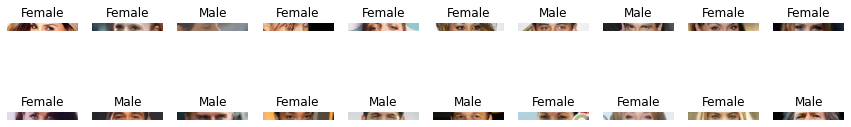

In [ ]:
#let us display the first 20 images
# !!! MAKE SURE THAT THE LABELS ARE CORRECT !!!
plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100 for display (you do not have to do this in the assignment)
    im = im[100:120]
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255.)
    plt.axis("off")
    
    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")
    

In [ ]:
train_img_array = onp.zeros((150, 20,178))
for k in range(150): 
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float) 
    im = im[100:120]
    im = onp.mean(im, axis=2)   
    train_img_array[k,:,:] = im
test_img_array = onp.zeros((50, 20,178))   
for l in range(150,200): 
    im2 = imageio.imread(os.path.join(path, all_img[l])).astype(float)  
    im2 = im2[100:120]
    im2 = onp.mean(im2, axis=2) 
    test_img_array[l-150,:,:] = im2


In [ ]:
y_train=[]
for k in range(150):
   y_train.insert(k,attribute["Male"][k])
y_train=np.asarray(y_train)

In [ ]:
y_test=[]
for l in range(150,200):
  y_test.insert(l,attribute["Male"][l])
y_test=np.asarray(y_test)

In [ ]:
number_of_train = train_img_array.shape[0]
x_train_flatten = train_img_array.reshape(number_of_train,train_img_array.shape[1]*train_img_array.shape[2])


In [ ]:
x_train_flatten.shape[1]

3560

In [ ]:
number_of_test = test_img_array.shape[0]
x_test_flatten = test_img_array.reshape(number_of_test,test_img_array.shape[1]*test_img_array.shape[2])

In [ ]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

In [ ]:
x_train_flatten.shape

(150, 3560)

In [ ]:
y_train.shape

(150,)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)

In [ ]:
model_log = logreg.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
print("====================Train=============================")
mnb_score = accuracy_score(y_train, y_train_pred)
auc_score = roc_auc_score(y_train,y_train_pred)
print(mnb_score, auc_score)
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))
print("====================Test=============================")
mnb_score = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test,y_test_pred)
print(mnb_score, auc_score)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

====================Train=============================
1.0 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        65

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[85  0]
 [ 0 65]]
====================Test=============================
0.64 0.625
              precision    recall  f1-score   support

          -1       0.70      0.70      0.70        30
           1       0.55      0.55      0.55        20

    accuracy                           0.64        50
   macro avg       0.62      0.62      0.62        50
weighted avg       0.64      0.64      0.64        50

[[21  9]
 [ 9 11]]


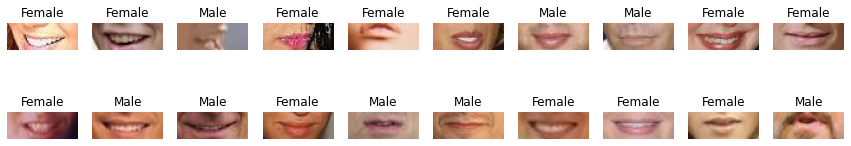

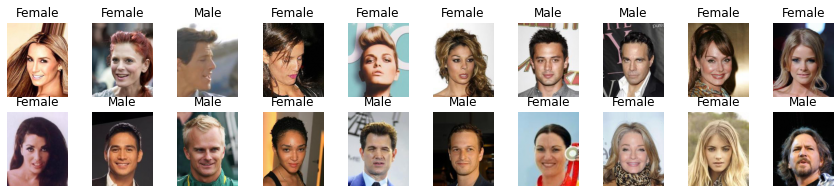

In [ ]:
# mouth
#let us display the first 40 images
# !!! MAKE SURE THAT THE LABELS ARE CORRECT !!!
plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100 for display (you do not have to do this in the assignment)
    im = im[142:165,60:120]
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255.)
    plt.axis("off")
    
    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")

plt.figure(figsize=(15,3))
for k in range(20):
    #load image
    im = imageio.imread(os.path.join(path, all_img[k])).astype(float)
    #resize to 100x100 for display (you do not have to do this in the assignment)
    #scale pixel intensity to [0,1] by divising by 255 and display
    plt.subplot(2,10,k+1)
    plt.imshow(im/255.)
    plt.axis("off")
    
    is_male = attribute["Male"][k]
    if is_male == 1:
        plt.title("Male")
    else:
        plt.title("Female")   

In [ ]:
train_img_array_mouth = onp.zeros((150, 23,60))
for k in range(150): 
    im_mouth = imageio.imread(os.path.join(path, all_img[k])).astype(float) 
    im_mouth = im_mouth[142:165,60:120]
    im_mouth = onp.mean(im_mouth, axis=2)   
    train_img_array_mouth[k,:,:] = im_mouth

test_img_array_mouth = onp.zeros((50, 23,60))   
for l in range(150,200): 
    im2_mouth = imageio.imread(os.path.join(path, all_img[l])).astype(float)  
    im2_mouth = im2_mouth[142:165,60:120]
    im2_mouth = onp.mean(im2_mouth, axis=2) 
    test_img_array_mouth[l-150,:,:] = im2_mouth

In [ ]:
y_train_mouth=[]
for k in range(150):
   y_train_mouth.insert(k,attribute["Male"][k])
y_train_mouth=np.asarray(y_train_mouth)

In [ ]:
y_test_mouth=[]
for l in range(150,200):
  y_test_mouth.insert(l,attribute["Male"][l])
y_test_mouth=np.asarray(y_test_mouth)

In [ ]:
number_of_train_mouth = train_img_array_mouth.shape[0]
x_train_flatten_mouth = train_img_array_mouth.reshape(number_of_train_mouth,train_img_array_mouth.shape[1]*train_img_array_mouth.shape[2])


In [ ]:
number_of_test_mouth = test_img_array_mouth.shape[0]
x_test_flatten_mouth = test_img_array_mouth.reshape(number_of_test_mouth,test_img_array_mouth.shape[1]*test_img_array_mouth.shape[2])

In [ ]:
x_train_mouth = x_train_flatten_mouth
x_test_mouth = x_test_flatten_mouth
y_test_mouth = y_test_mouth.T
y_train_mouth = y_train_mouth.T

In [ ]:
model_log_mouth = logreg.fit(x_train_mouth, y_train_mouth)

In [ ]:
y_train_pred_mouth = logreg.predict(x_train_mouth)
y_test_pred_mouth = logreg.predict(x_test_mouth)
print("====================Train=============================")
mnb_score_mouth = accuracy_score(y_train_mouth, y_train_pred_mouth)
auc_score_mouth = roc_auc_score(y_train_mouth,y_train_pred_mouth)
print(mnb_score_mouth, auc_score_mouth)
print(classification_report(y_train_mouth, y_train_pred_mouth))
print(confusion_matrix(y_train_mouth, y_train_pred_mouth))
print("====================Test=============================")
mnb_scor_mouth = accuracy_score(y_test_mouth, y_test_pred_mouth)
auc_score_mouth = roc_auc_score(y_test_mouth,y_test_pred_mouth)
print(mnb_score_mouth, auc_score_mouth)
print(classification_report(y_test_mouth, y_test_pred_mouth))
print(confusion_matrix(y_test_mouth, y_test_pred_mouth))

====================Train=============================
1.0 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        65

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[85  0]
 [ 0 65]]
====================Test=============================
1.0 0.6666666666666666
              precision    recall  f1-score   support

          -1       0.76      0.63      0.69        30
           1       0.56      0.70      0.62        20

    accuracy                           0.66        50
   macro avg       0.66      0.67      0.66        50
weighted avg       0.68      0.66      0.66        50

[[19 11]
 [ 6 14]]
